In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = [6.4, 4.8]
from datetime import datetime

In [2]:
data = pd.read_csv(r"C:/Users/piyus/Desktop/Review 2/muf.csv")
data.shape
# parsing string to a date time type
data['months']=pd.to_datetime(data['months'], infer_datetime_format=True)
data=data.set_index(['months'])
print(data)

            total gallons
months                   
2012-01-01      670383000
2012-01-02      602754700
2012-01-03      657267600
2012-01-04      627037300
2012-01-05      681098100
...                   ...
2018-01-05      698846800
2018-01-06      755173900
2018-01-07      722047200
2018-01-08      797423300
2018-01-09      767213100

[81 rows x 1 columns]


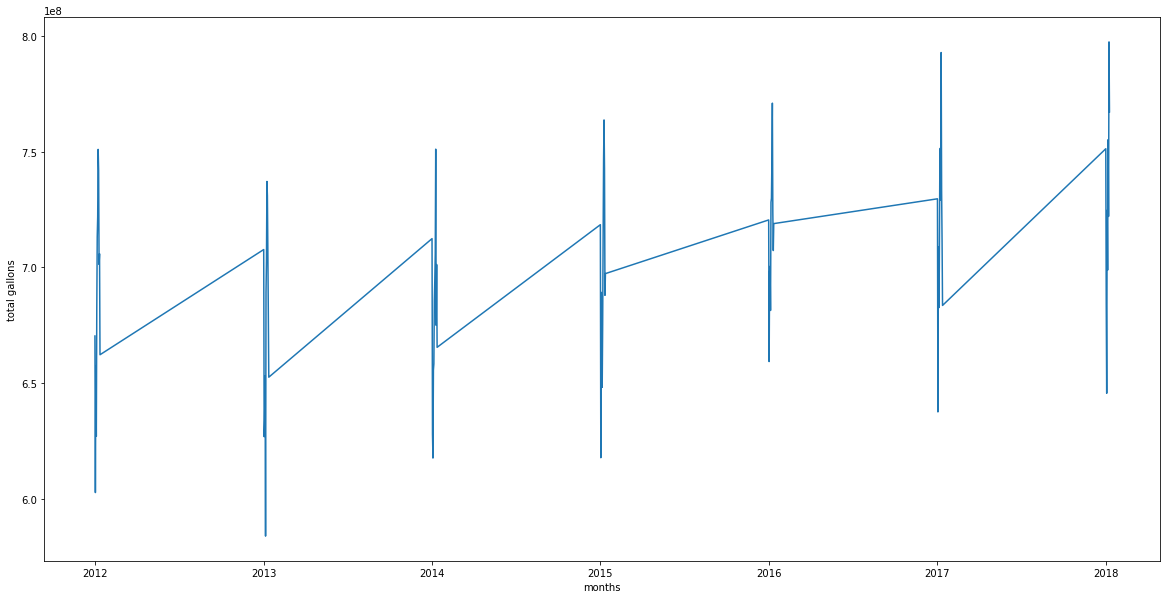

In [3]:
# Plotting Graph
plt.figure(figsize=(20,10))
plt.xlabel("months")
plt.ylabel("total gallons")
plt.plot(data)

In [4]:
# Determining Rolling Statistics
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean)
print(rolstd)

            total gallons
months                   
2012-01-01            NaN
2012-01-02            NaN
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
...                   ...
2018-01-05   7.204040e+08
2018-01-06   7.217880e+08
2018-01-07   7.193353e+08
2018-01-08   7.250250e+08
2018-01-09   7.228896e+08

[81 rows x 1 columns]
            total gallons
months                   
2012-01-01            NaN
2012-01-02            NaN
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
...                   ...
2018-01-05   3.877129e+07
2018-01-06   3.976231e+07
2018-01-07   3.865675e+07
2018-01-08   4.477294e+07
2018-01-09   4.175395e+07

[81 rows x 1 columns]


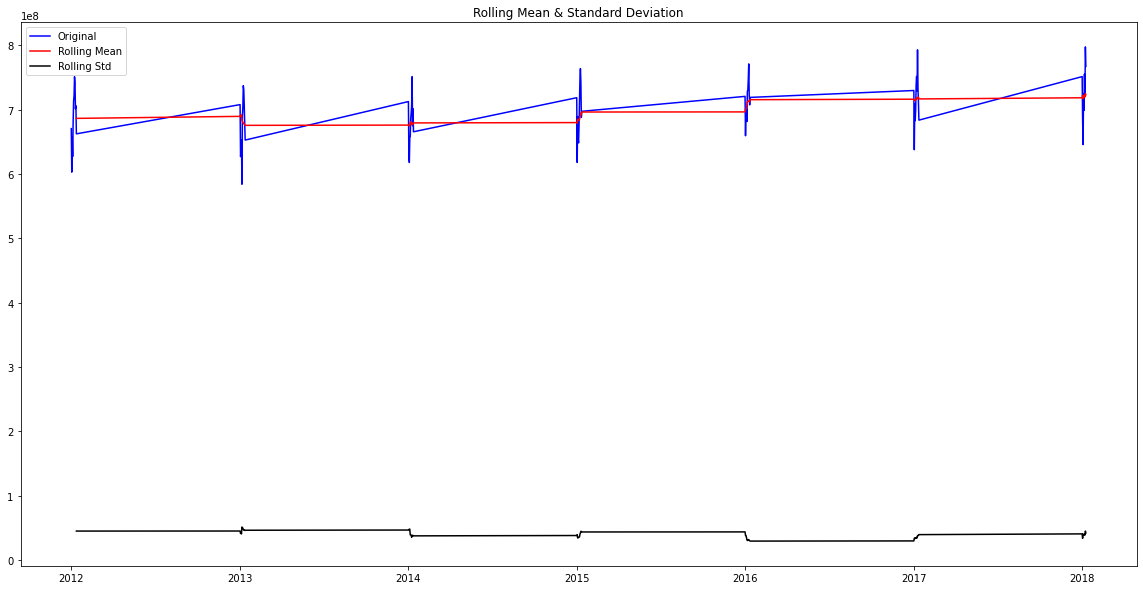

In [5]:
# plotting rolling stastics
plt.figure(figsize=(20,10))
original=plt.plot(data, color='blue', label='Original')
mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [6]:
# Performing Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results For Dickey-Fuller Test: ')
dftest=adfuller(data['total gallons'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results For Dickey-Fuller Test: 
Test Statistic           0.482430
p-value                  0.984329
Lags Used               12.000000
No. of Obs              68.000000
Critical Value (1%)     -3.530399
Critical Value (5%)     -2.905087
Critical Value (10%)    -2.590001
dtype: float64


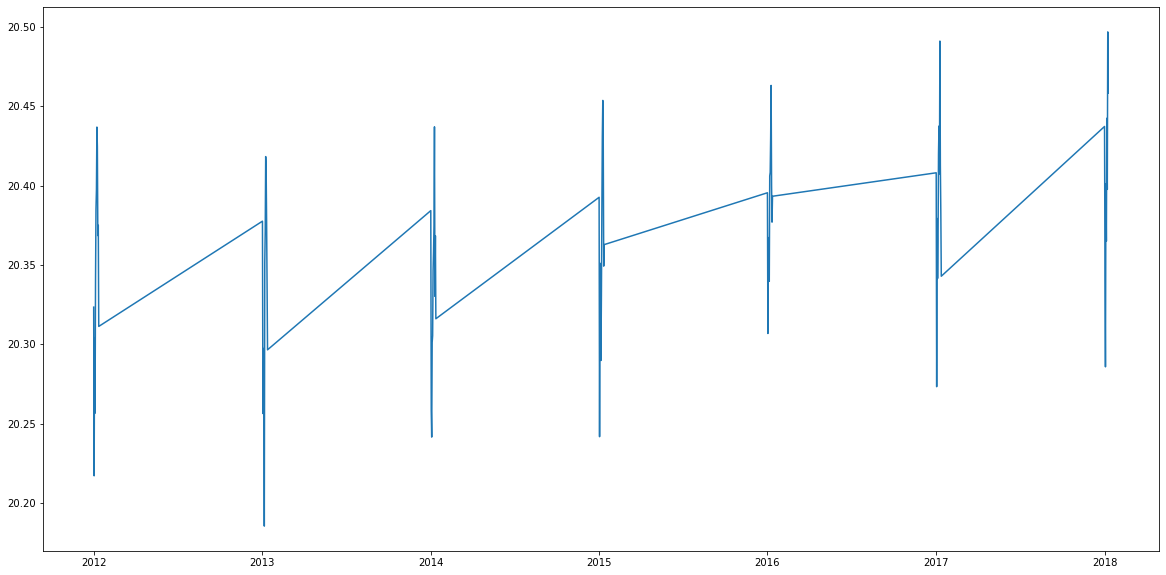

In [7]:
# Estimating Trends
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

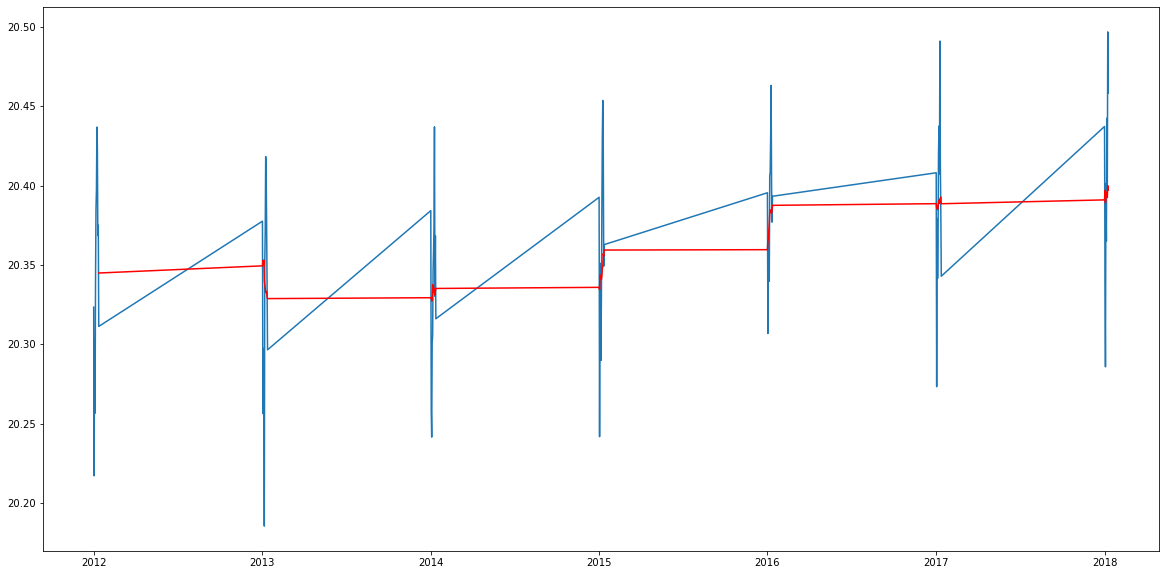

In [8]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='red')

In [9]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,total gallons
months,
2012-01-12,-0.033675
2013-01-01,0.028173
2013-01-02,-0.096392
2013-01-03,-0.082035
2013-01-04,-0.055744


In [10]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='blue', label='original')
    mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['total gallons'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

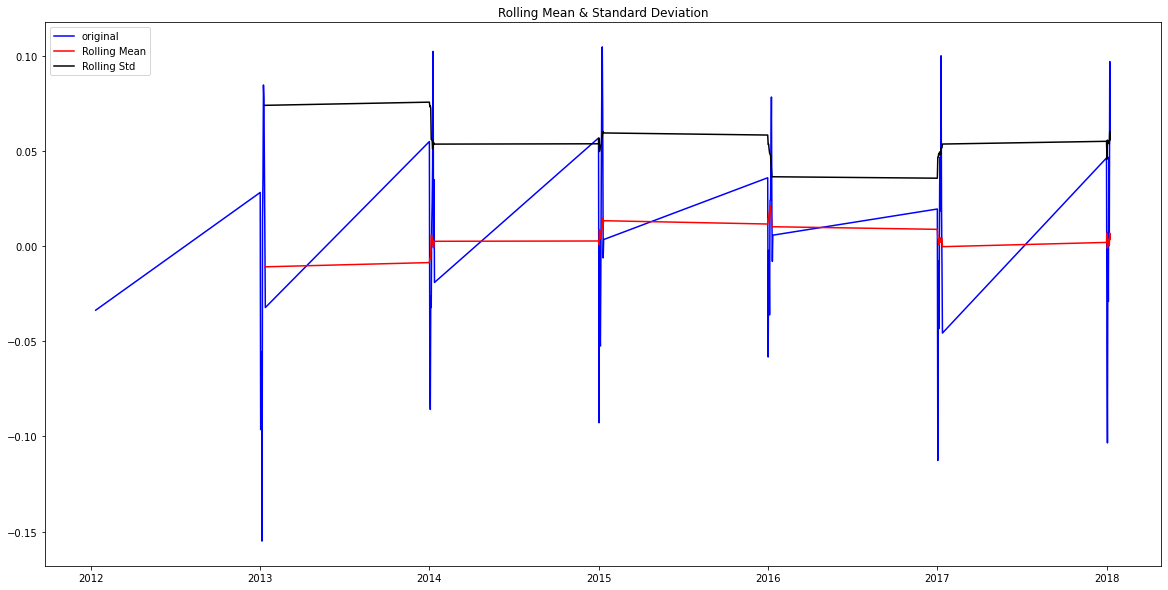

Dickey-Fuller Test: 
Test Statistic          -2.360380
p-value                  0.153232
Lags Used               11.000000
No. of Obs              58.000000
Critical Value (1%)     -3.548494
Critical Value (5%)     -2.912837
Critical Value (10%)    -2.594129
dtype: float64


In [11]:
stationarity(data_log_diff)

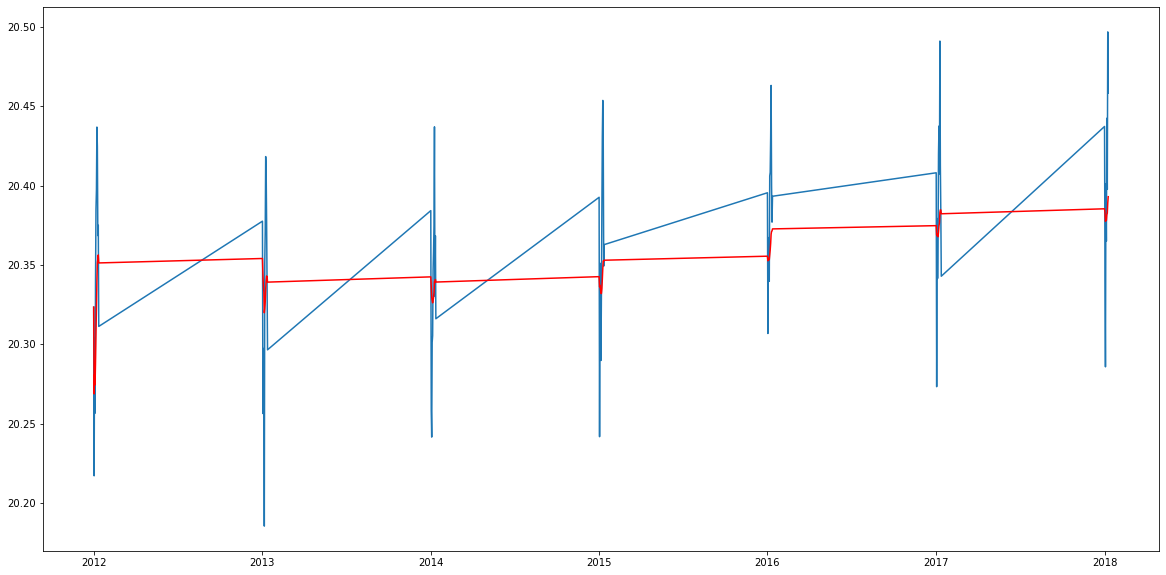

In [13]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='red')

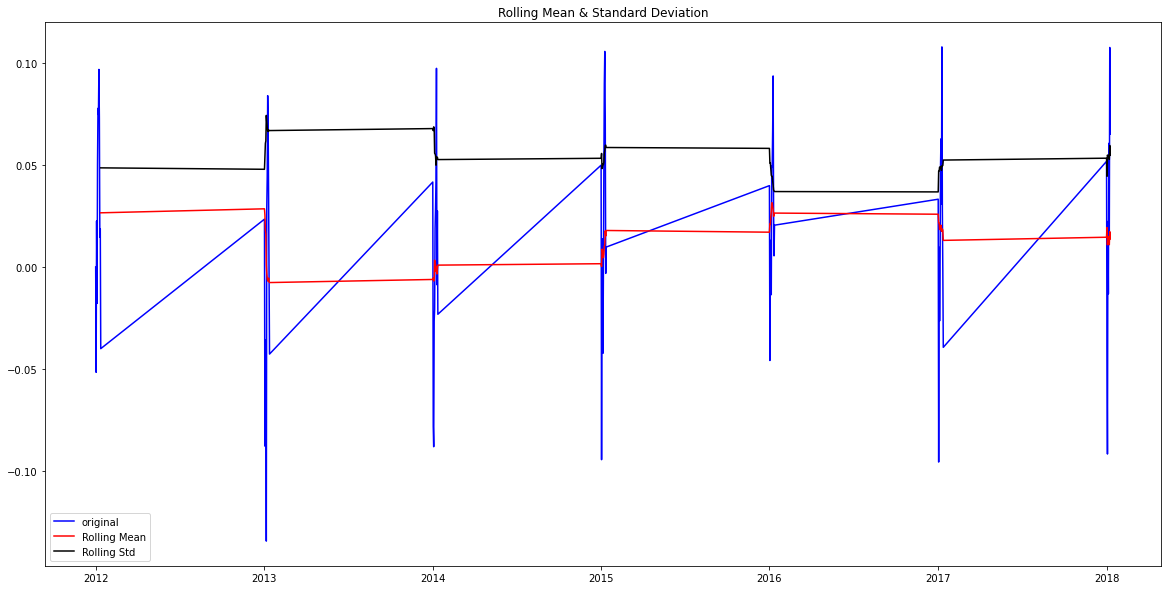

Dickey-Fuller Test: 
Test Statistic          -1.606840
p-value                  0.480157
Lags Used               11.000000
No. of Obs              69.000000
Critical Value (1%)     -3.528890
Critical Value (5%)     -2.904440
Critical Value (10%)    -2.589656
dtype: float64


In [14]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

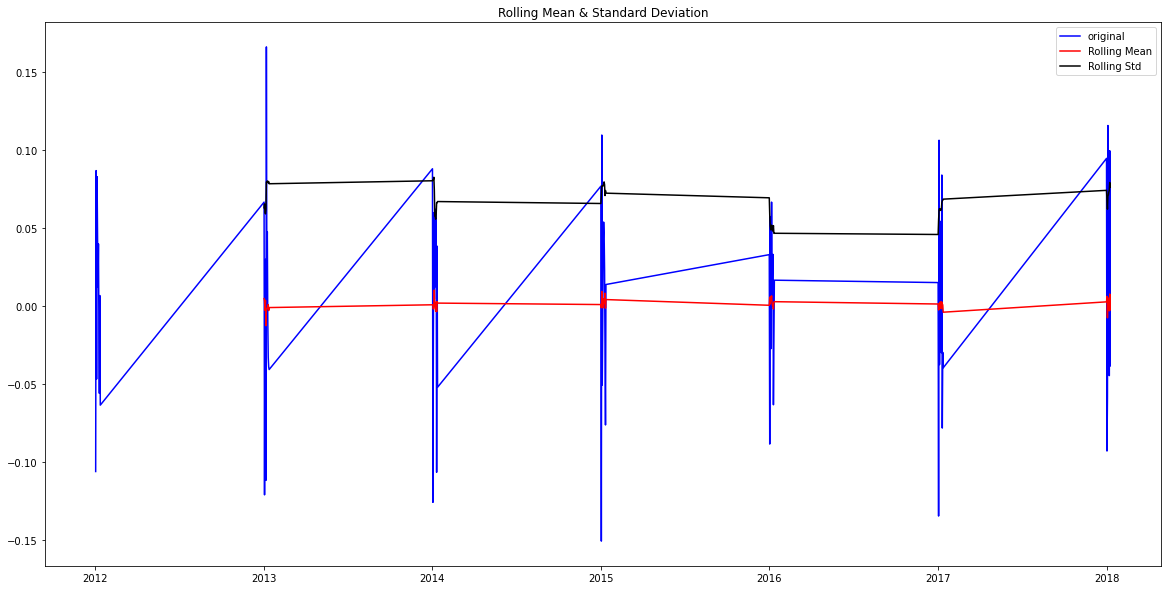

Dickey-Fuller Test: 
Test Statistic         -6.915051e+00
p-value                 1.185347e-09
Lags Used               1.100000e+01
No. of Obs              6.800000e+01
Critical Value (1%)    -3.530399e+00
Critical Value (5%)    -2.905087e+00
Critical Value (10%)   -2.590001e+00
dtype: float64


In [15]:
data_shift=data_log-data_log.shift()

data_shift=data_shift.dropna()
stationarity(data_shift)

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [17]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

NameError: name 'residual' is not defined

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

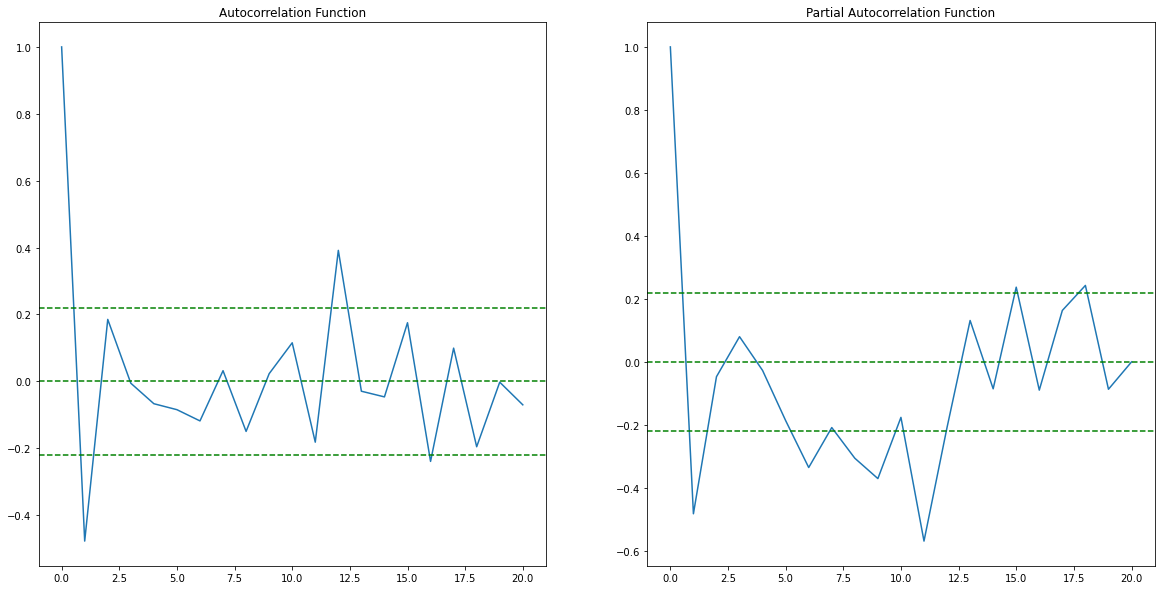

In [18]:
# ARIMA Model
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

plotting ARIMA model


C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


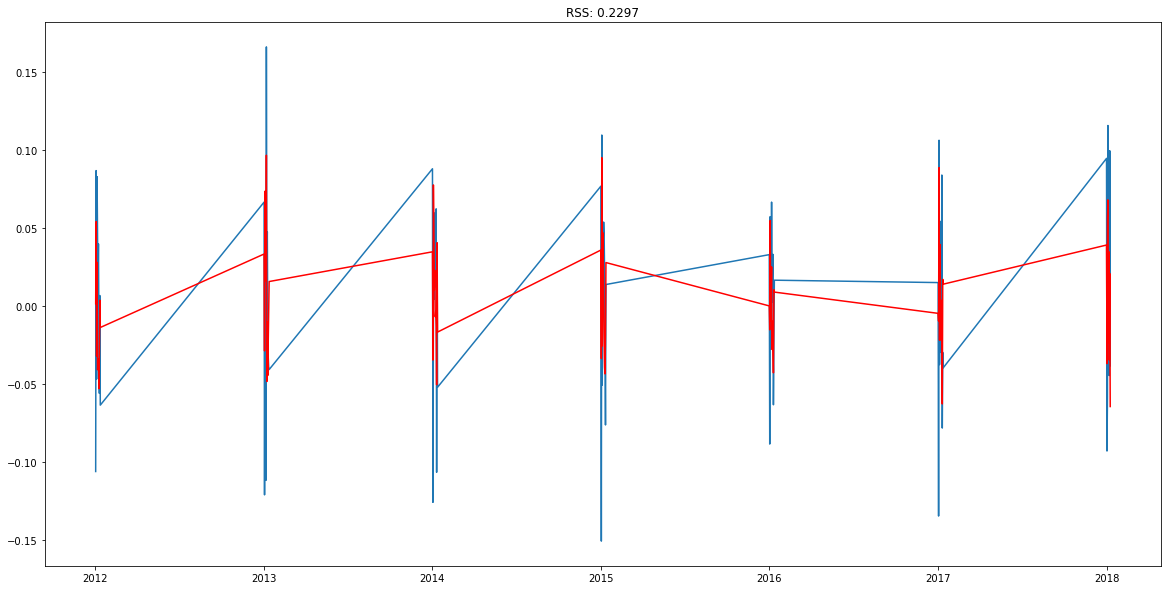

In [46]:
# Arima Model
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['total gallons'])**2))
print('plotting ARIMA model')

In [47]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

months
2012-01-02    0.001279
2012-01-03    0.053902
2012-01-04   -0.032321
2012-01-05    0.027761
2012-01-06   -0.041046
dtype: float64


In [48]:
# convert to cumulative sum
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

months
2012-01-02    0.001279
2012-01-03    0.055181
2012-01-04    0.022860
2012-01-05    0.050622
2012-01-06    0.009576
dtype: float64


In [49]:
predictions_log=pd.Series(data_log['total gallons'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

months
2012-01-01    20.323360
2012-01-02    20.218300
2012-01-03    20.358783
2012-01-04    20.279377
2012-01-05    20.389838
dtype: float64

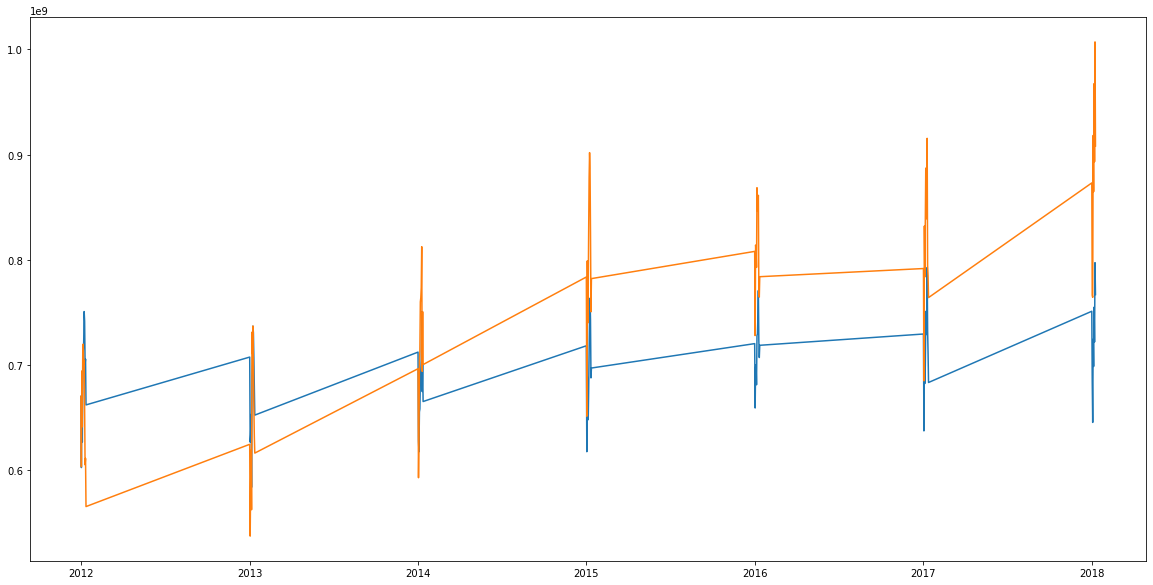

In [50]:

predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\piyus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


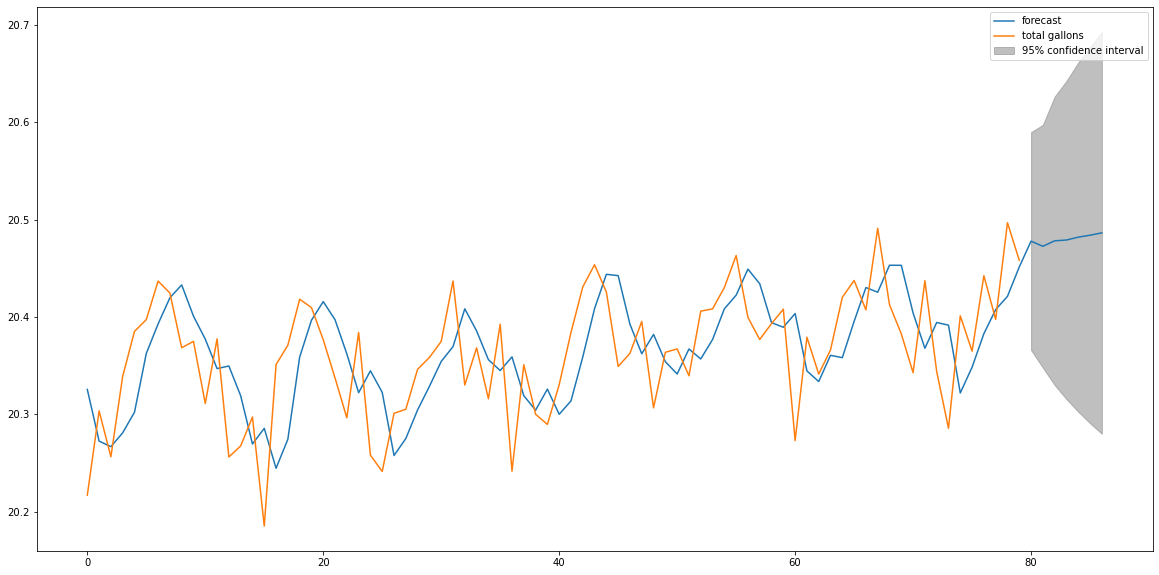

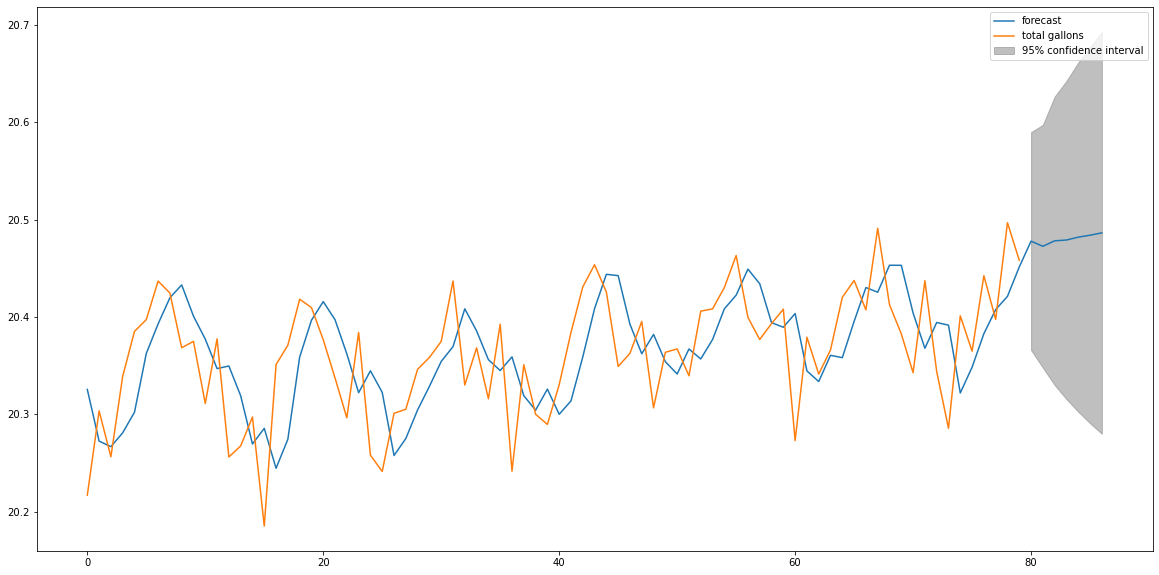

In [44]:

rcParams['figure.figsize']=20,10
results.plot_predict(1,87)

In [45]:
results.forecast(steps=24)

(array([20.47794628, 20.47264964, 20.47825544, 20.47910057, 20.4820245 ,
        20.4840407 , 20.48645327, 20.48869276, 20.49100783, 20.49328989,
        20.49558637, 20.49787655, 20.50016948, 20.50246122, 20.50475347,
        20.5070455 , 20.50933763, 20.51162971, 20.51392181, 20.51621391,
        20.518506  , 20.5207981 , 20.5230902 , 20.52538229]),
 array([0.0570998 , 0.06364096, 0.07557739, 0.08338773, 0.09149344,
        0.09854093, 0.10527813, 0.1115428 , 0.11750144, 0.12316066,
        0.12857583, 0.13376995, 0.13877064, 0.14359694, 0.14826636,
        0.15279309, 0.15718954, 0.16146631, 0.1656327 , 0.16969682,
        0.17366586, 0.17754619, 0.18134351, 0.18506294]),
 array([[20.36603272, 20.58985983],
        [20.34791565, 20.59738362],
        [20.33012648, 20.62638439],
        [20.31566363, 20.64253751],
        [20.30270066, 20.66134834],
        [20.29090403, 20.67717737],
        [20.28011193, 20.69279461],
        [20.27007288, 20.70731264],
        [20.26070924, 20.721